# Modelos basados en árbol / Análisis y Predicción de Precios de Autos (Core)

Objetivo: Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

### Dataset: Automobile Dataset

Descripción del Dataset: Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

### Instrucciones:

### Parte 1: Análisis Exploratorio de Datos (EDA)

 1. Carga y Exploración de Datos:

* Cargar el dataset y revisar la estructura básica.
* Descripción de las variables y su distribución.
* Detección y tratamiento de valores nulos.
* Identificación y tratamiento de outliers.
* Análisis de correlación entre variables.

### Parte 2: Preparación de Datos

 2. Preprocesamiento:

* Selección de características importantes.
* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

### Parte 3: Modelos de Regresión

 3. Regresión Lineal:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).
 

4. K-Nearest Neighbors (KNN):

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).
 
 5. Árbol de Decisión:

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

### Parte 4: Benchmarking y Comparación de Modelos

 6. Comparación de Modelos:

* Comparar los resultados de los tres modelos en términos de MSE y R².
* Discusión sobre las diferencias en el rendimiento de los modelos.
* Conclusión

 7. Interpretación de Resultados:

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

### Tareas Adicionales y Desafíos

 8. Desafíos Adicionales:

* Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
* Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
* Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.
* Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

In [1]:
# Librerías de manipulación y análisis de datos
import pandas as pd
import numpy as np

#Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías de preprocesamiento y transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Evaluación del rendimiento de los modelos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Optimización de modelos y validación cruzada
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score

import utils



In [2]:
data = pd.read_csv('../Data/Automobile_data.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,...,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [3]:
# Reemplazamos todos los '?' por NaN
data.replace('?', np.nan, inplace = True)

In [4]:
data_dict = {
    'symboling': 'float',
    'normalized-losses': 'float',
    'make': 'category',
    'fuel-type': 'category',
    'aspiration': 'category',
    'num-of-doors': 'category',
    'body-style': 'category',
    'drive-wheels': 'category',
    'engine-location': 'category',
    'wheel-base': 'float',
    'length': 'float',
    'width': 'float',
    'height': 'float',
    'curb-weight': 'float',
    'engine-type':'category',
    'num-of-cylinders':'category',
    'engine-size':'float',
    'fuel-system':'category',
    'bore':'float',
    'stroke':'float',
    'compression-ratio':'float',
    'horsepower':'float',
    'peak-rpm':'float',
    'city-mpg':'float',
    'highway-mpg':'float',
    'price': 'float',
    
    
    
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    data[column] = data[column].astype(dtype, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    float64 
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    category
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       203 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    float64 
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

In [5]:
# Seleccionamos las columnas numericas
data_num = data.select_dtypes(include=['int64','float'])

In [6]:
data_num.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

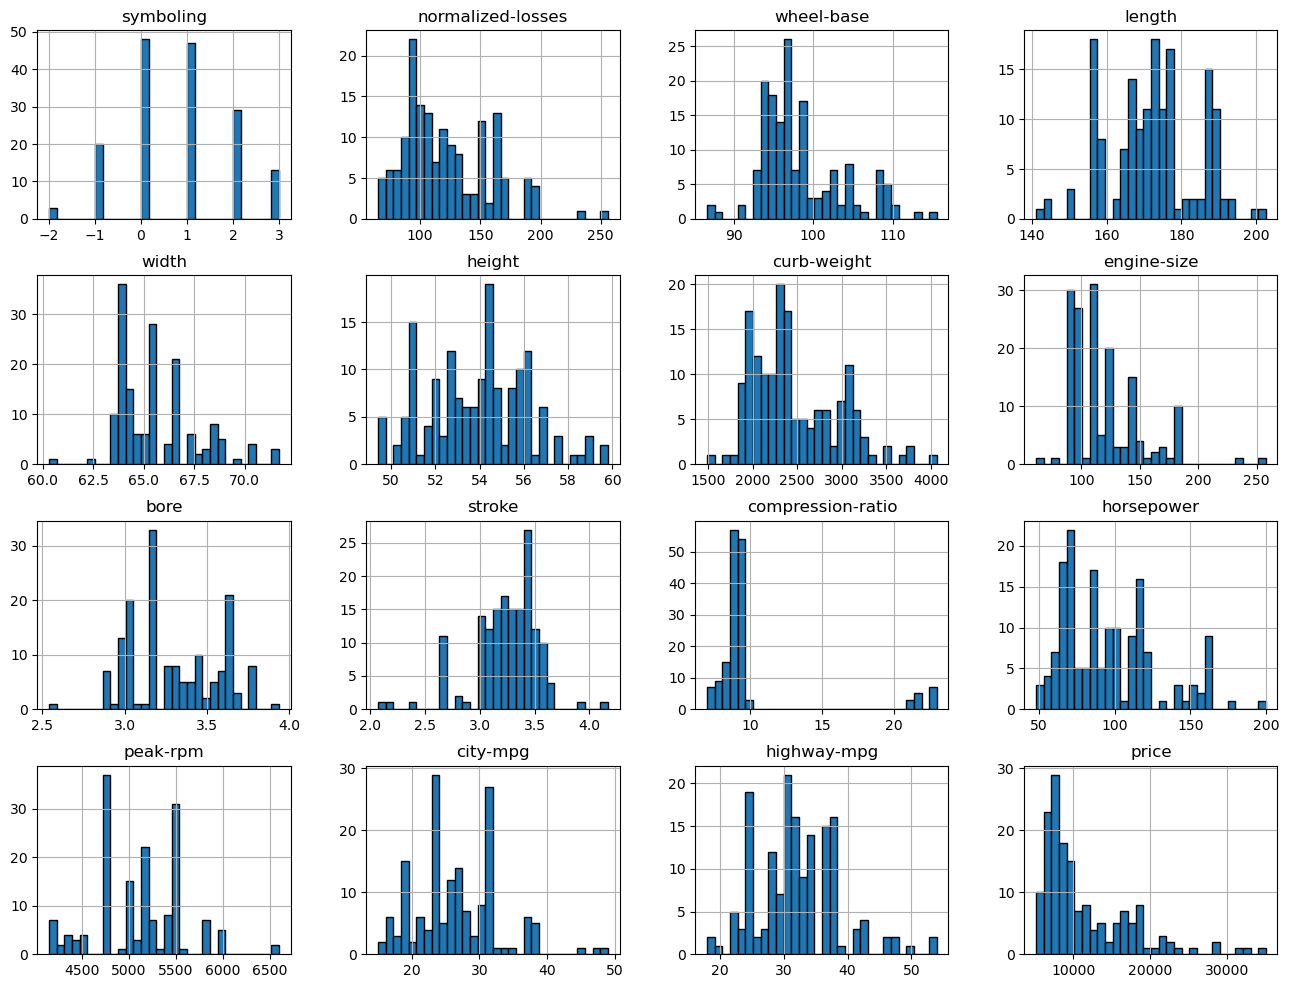

In [7]:
data_num.dropna().hist(figsize=(16, 12), bins=30, edgecolor='black')

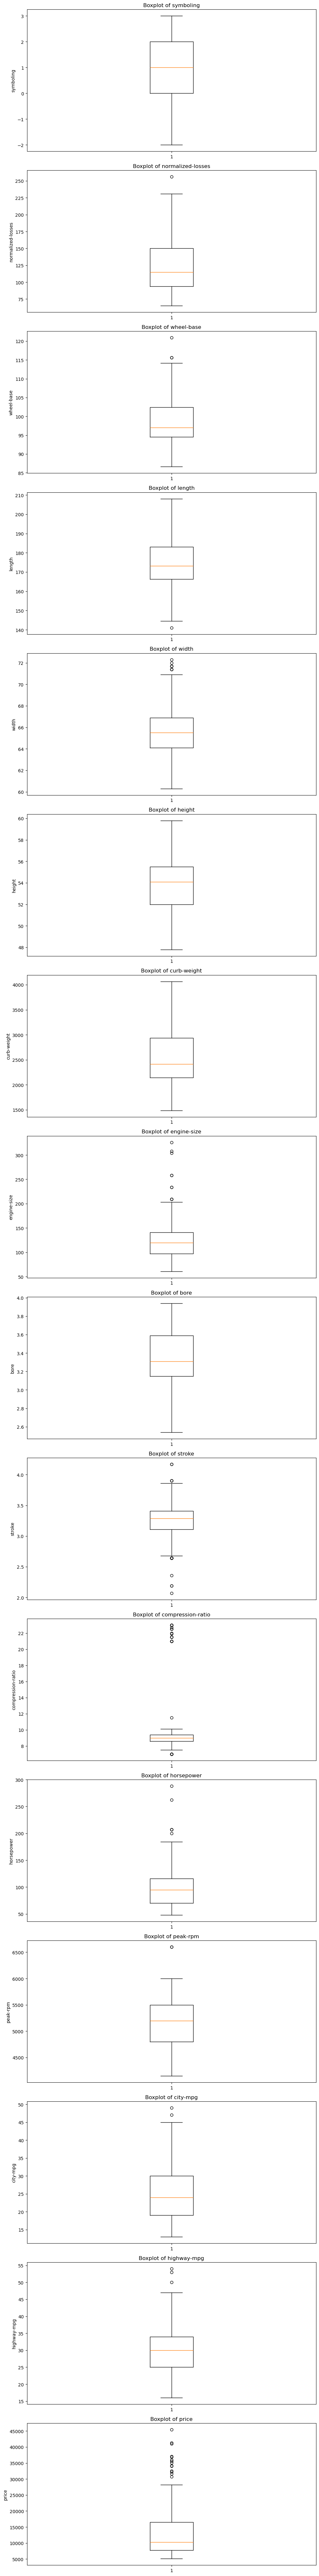

In [8]:

num_columns = data_num.shape[1]
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, num_columns * 5))

# Iterar sobre cada columna y crear un boxplot
for i, column in enumerate(data_num.columns):
    axes[i].boxplot(data_num[column].dropna())
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()



In [9]:
utils.calculate_na_statistics(data_num)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
bore,201,4,1.95
stroke,201,4,1.95
price,201,4,1.95
horsepower,203,2,0.98
peak-rpm,203,2,0.98
symboling,205,0,0.00
wheel-base,205,0,0.00
length,205,0,0.00
width,205,0,0.00


In [10]:
utils.detect_outliers_iqr(data_num).sum()

symboling             0
normalized-losses     1
wheel-base            3
length                1
width                 8
height                0
curb-weight           0
engine-size          10
bore                  0
stroke               20
compression-ratio    28
horsepower            6
peak-rpm              2
city-mpg              2
highway-mpg           3
price                14
dtype: int64

In [11]:
data_num.corr(method='pearson')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


In [12]:
import seaborn as sns

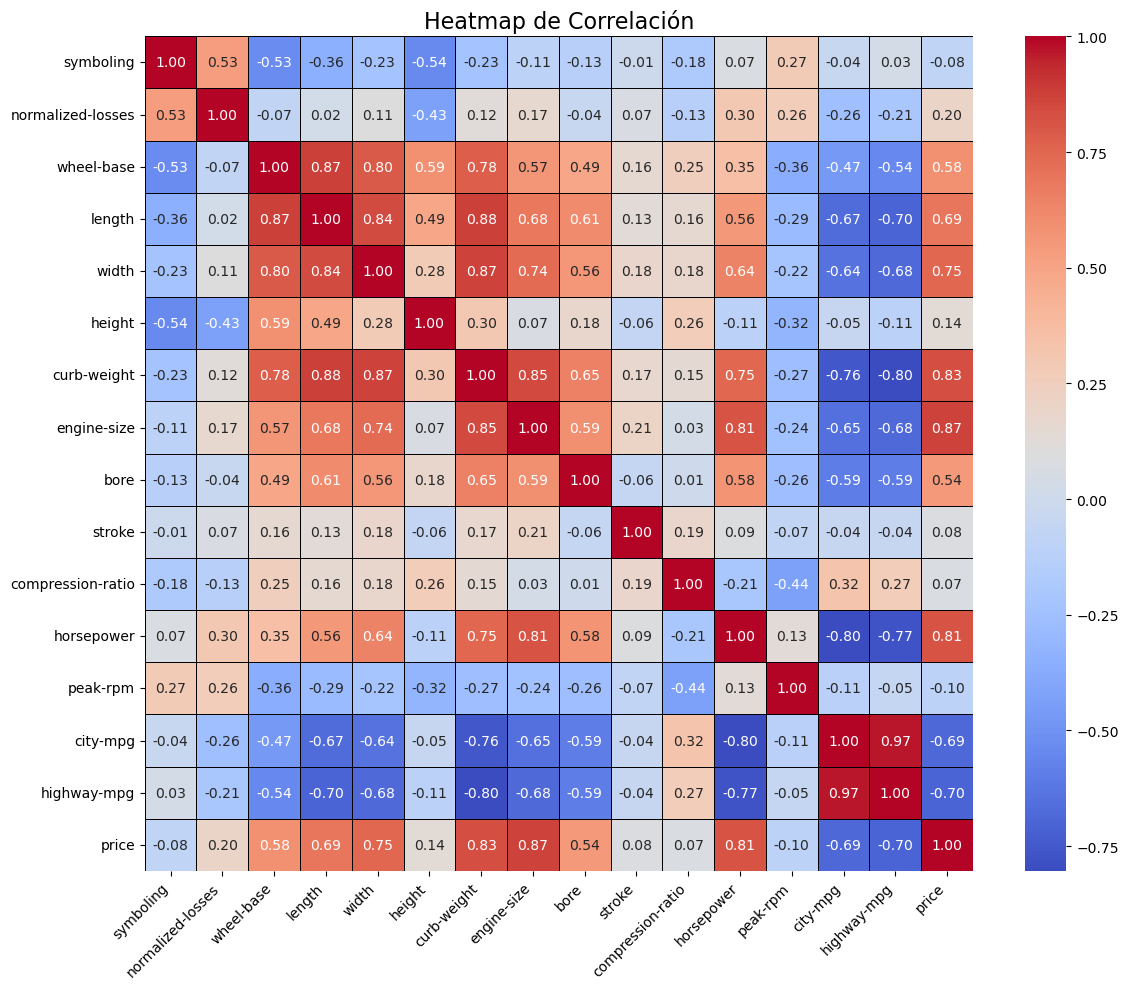

In [13]:
# Crear la figura y el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_num.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')

# Agregar título y ajustar el diseño
plt.title('Heatmap de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [14]:
data_cat = data.select_dtypes(include='category')

In [15]:
data_cat

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [16]:
data_num.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [17]:
# Imputar valores faltantes en la columna objetivo 'price' con 0
# Eliminar filas con valores faltantes en 'price'
# Imputar valores faltantes en 'price' con 0
data_num['price'] = data_num['price'].fillna(0)




In [18]:

# Separar características y variable objetivo
X = data_num.drop(columns=['price'])
y = data_num['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los transformadores para características numéricas y categóricas
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),  # Imputación para valores numéricos
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación para valores categóricos
    ("encoder", OneHotEncoder())
])

# Combinar los transformadores en un ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("data_num", numerical_pipeline, X.select_dtypes(include=['float64', 'int']).columns),
        ("data_cat", categorical_pipeline, X.select_dtypes(include=['category', 'object']).columns)
    ],
    remainder='passthrough'
)

# Transformar el conjunto de entrenamiento y prueba
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_transformed, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test_transformed)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')


Error Cuadrático Medio: 22072581.370586824
R-cuadrado: 0.7012218377019279


In [19]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('data_num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')),
                                ('data_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index([], dtype='object'))])

In [20]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.5000,-0.539835,0.573309,0.076413,0.235105,0.043859,-0.221382,-0.121429,0.075808,0.669196,-0.344056,-0.295912,-1.138176,0.370118,0.270248
1,0.1250,-1.628995,0.622875,0.302880,0.924984,0.408026,0.646950,0.314497,1.065137,-0.187774,-0.531628,1.678333,-0.107239,-0.986981,-1.017934
2,-1.5000,-0.539835,0.573309,0.076413,0.235105,0.448489,-0.179118,-0.412047,-0.008390,0.281519,3.353784,-0.747848,-0.751574,0.879030,0.431271
3,0.9375,0.666620,-2.037199,-2.430901,-0.960684,-1.210497,-1.448956,-0.847973,-0.766174,0.403943,-0.210076,-0.676490,1.181432,1.048668,1.236385
4,-0.6875,1.521192,0.375042,0.173470,-0.546757,0.205711,0.262732,0.895732,0.075808,-0.044946,-0.263668,0.393884,-1.073742,-0.647706,-0.373843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.1250,2.241714,0.044598,0.310968,0.878992,-1.655591,1.086878,1.307440,0.328402,0.118286,-0.263668,1.321542,0.150495,-0.986981,-0.856911
139,0.1250,-1.628995,0.755053,1.160219,0.419073,0.772194,0.925507,0.895732,0.075808,-0.044946,-0.263668,0.393884,-1.073742,-0.817344,-0.856911
140,0.1250,0.415275,-0.731945,-0.756662,-1.006675,0.286637,-1.220347,-0.726882,-0.260985,0.159095,-0.156485,-0.842992,0.150495,1.048668,1.075362
141,1.7500,1.671999,0.655920,0.715373,0.787008,-0.724940,0.850585,1.065259,-0.008390,0.281519,-0.183280,1.345328,0.150495,-0.986981,-1.017934


In [21]:
X_train_transformed

array([[-1.5       , -0.53983455,  0.57330873, ..., -1.13817553,
         0.37011796,  0.27024799],
       [ 0.125     , -1.62899499,  0.62287532, ..., -0.10723902,
        -0.98698122, -1.01793411],
       [-1.5       , -0.53983455,  0.57330873, ..., -0.75157434,
         0.87903015,  0.43127076],
       ...,
       [ 0.125     ,  0.41527537, -0.73194494, ...,  0.1504951 ,
         1.04866755,  1.07536181],
       [ 1.75      ,  1.67199896,  0.65591972, ...,  0.1504951 ,
        -0.98698122, -1.01793411],
       [-0.6875    ,  0.18068697,  0.24286476, ...,  0.1504951 ,
        -1.32625602, -1.33997964]])

### Otro tipo de modelo

In [22]:
data2 = data.copy()
data2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [23]:
X = data2.drop(columns=['price'])
y = data2['price']

# Eliminar filas donde 'price' es NaN
mask = ~y.isna()  # Crear máscara de valores no-NaN
X = X[mask]
y = y[mask]


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.28, random_state=0, shuffle=True
)

# Definir transformaciones
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['category', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 1. Modelo KNN
# Crear pipeline completo incluyendo el modelo KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar el pipeline completo
pipeline_knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('Resultados del modelo KNN:')
print(f'Error Cuadrático Medio: {mse_knn}')
print(f'R-cuadrado: {r2_knn}')

# 2. Modelo Árbol de Decisión
# Crear pipeline completo incluyendo el modelo de Árbol de Decisión
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=0))
])

# Entrenar el pipeline completo
pipeline_dt.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = pipeline_dt.predict(X_test)

# Evaluar el modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\nResultados del modelo Árbol de Decisión:')
print(f'Error Cuadrático Medio: {mse_dt}')
print(f'R-cuadrado: {r2_dt}')

# 3. Modelo de Regresión Lineal
# Crear pipeline completo incluyendo el modelo de Regresión Lineal
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el pipeline completo
pipeline_lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('\nResultados del modelo de Regresión Lineal:')
print(f'Error Cuadrático Medio: {mse_lr}')
print(f'R-cuadrado: {r2_lr}')

Resultados del modelo KNN:
Error Cuadrático Medio: 28959016.896842107
R-cuadrado: 0.6793034551270417

Resultados del modelo Árbol de Decisión:
Error Cuadrático Medio: 9083728.94736842
R-cuadrado: 0.8994054080509483

Resultados del modelo de Regresión Lineal:
Error Cuadrático Medio: 3.802828070378789e+31
R-cuadrado: -4.211309476632701e+23


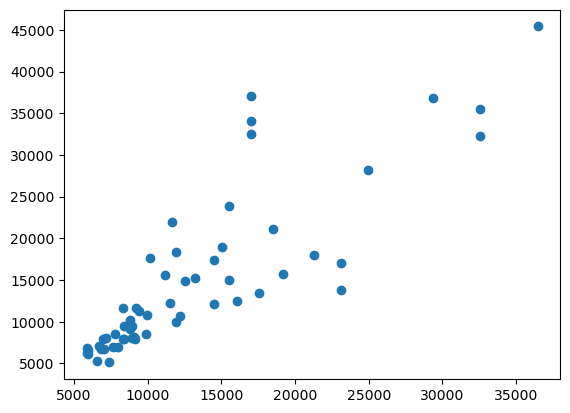

In [24]:
plt.scatter(y_pred_knn,y_test)


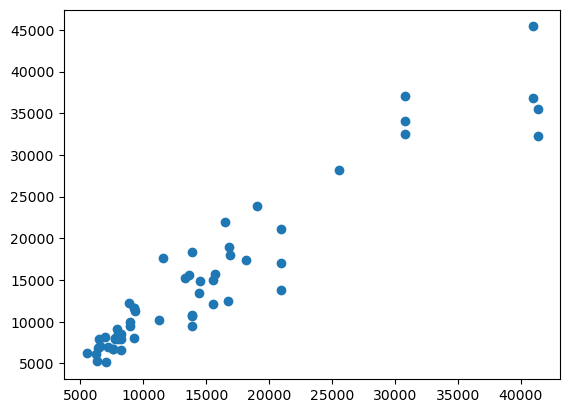

In [25]:
plt.scatter(y_pred_dt,y_test)